# ref. 데이터 목록

각, 번호는 실제 `csv`파일 목록들의 번호임 

`1` [서울시 학교별 교육운영 특색사업 계획 현황](https://data.seoul.go.kr/dataList/OA-22333/S/1/datasetView.do)

`2` [서울시 학교별 보건관리 현황](https://data.seoul.go.kr/dataList/OA-22337/S/1/datasetView.do)

`3` [서울시 학교별 직원 현황](https://data.seoul.go.kr/dataList/OA-22344/S/1/datasetView.do)

`4` [서울시 학교별, 학급별 학생수 현황](https://data.seoul.go.kr/dataList/OA-22316/S/1/datasetView.do)

`5` [서울시 학교별 학생의 체력 증진에 관한 사항](https://data.seoul.go.kr/dataList/OA-22345/S/1/datasetView.do)

`6` [서울시 학교 근황](https://data.seoul.go.kr/dataList/OA-22314/S/1/datasetView.do)

`7` [서울시 학교별 학교시설 개방에 관한 사항](https://data.seoul.go.kr/dataList/OA-22326/S/1/datasetView.do)

`8` [서울시 학교별 표시과목별 교원 현황](https://data.seoul.go.kr/dataList/OA-22320/S/1/datasetView.do)

`9` [서울시 학교별 자격종별 교원 현황](https://data.seoul.go.kr/dataList/OA-22319/S/1/datasetView.do)

# 0. 데이터 로드

`-` 일단 각 데이터를 모두 불러온 후 살펴보자

In [1]:
# | code-fold : true
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
import warnings

warnings.filterwarnings(action = "ignore")

In [2]:
for i in range(1,10) :
    exec(f"df{i} = pd.read_csv('data/{i}.csv', encoding = 'cp949')") 

# 1. 서울시 학교별 교육운영 특색사업 계획 현황

`-` 해당 데이터는 학교별 교육운영 특색사업이 현재 시행되고 있나, 아닌가를 보여주는 데이터이다.

`-` 일단, 서울시 지역을 구단위로 나누어서 EDA를 수행해보자.

* 지역의 `null`값은 기타로 채워넣기!

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   시도교육청                   4080 non-null   object 
 1   시도교육청코드                 4080 non-null   object 
 2   교육지원청                   4080 non-null   object 
 3   교육지원청코드                 4080 non-null   object 
 4   지역                      4079 non-null   object 
 5   지역코드                    4079 non-null   float64
 6   소재지구분코드                 4080 non-null   int64  
 7   정보공시 학교코드               4080 non-null   object 
 8   학교명                     4080 non-null   object 
 9   학교급코드                   4080 non-null   int64  
 10  설립구분                    4080 non-null   object 
 11  제외여부                    4080 non-null   object 
 12  제외사유                    19 non-null     object 
 13  교과교실제(지정?운영)            3986 non-null   object 
 14  자율학교(지정?운영)             4061 non-null   

In [4]:
df1["지역"].fillna("서울특별시 기타",inplace = True)

,시도교육청,시도교육청코드,교육지원청,교육지원청코드,지역,지역코드,소재지구분코드,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,교과교실제(지정?운영),자율학교(지정?운영),수준별 수업(운영),영어교육프로그램(운영)(2020년 이전),학교과정구분값(2-3-4),학교과정구분명(초-중-고),공시연도
0,서울특별시교육청,A000000001,교육부,A000000001,서울특별시 서초구,1.165011e+09,1,S000003511,서울교육대학교부설초등학교,2,국립,N,NaN,×,○,×,NaN,NaN,NaN,2021
1,서울특별시교육청,A000000001,교육부,A000000001,서울특별시 종로구,1.111017e+09,1,S000003563,서울대학교사범대학부설초등학교,2,국립,N,NaN,×,×,×,NaN,2,초,2021
2,서울특별시교육청,B100000001,서울특별시강남서초교육지원청,B100000249,서울특별시 강남구,1.168010e+09,1,S010000738,서울개일초등학교,2,공립,N,NaN,×,×,×,NaN,2,초,2021
3,서울특별시교육청,B100000001,서울특별시강남서초교육지원청,B100000249,서울특별시 강남구,1.168010e+09,1,S010000741,서울구룡초등학교,2,공립,N,NaN,×,○,×,NaN,NaN,NaN,2021
4,서울특별시교육청,B100000001,서울특별시강남서초교육지원청,B100000249,서울특별시 강남구,1.168011e+09,1,S010000742,서울논현초등학교,2,공립,N,NaN,×,○,×,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,서울특별시교육청,B100000001,서울특별시교육청,B100000001,서울특별시 종로구,1.111018e+09,1,S010005841,서울다솜관광고등학교,10,공립,N,NaN,×,×,○,NaN,4,고,2024
4076,서울특별시교육청,B100000001,서울특별시교육청,B100000001,서울특별시 서초구,1.165011e+09,1,S010006026,서초문화예술정보학교,10,공립,N,NaN,×,×,×,NaN,4,고,2024
4077,서울특별시교육청,B100000001,서울특별시교육청,B100000001,서울특별시 은평구,1.138011e+09,1,S010006027,은평문화예술정보학교,10,공립,N,NaN,×,×,×,NaN,4,고,2024
4078,서울특별시교육청,B100000001,서울특별시교육청,B100000001,서울특별시 금천구,1.154510e+09,1,S010006380,금천문화예술정보학교,10,공립,N,NaN,×,×,×,NaN,4,고,2024


`1` 각 구만 표시하는 컬럼을 추출

In [5]:
df1["자치구"] = [i.split()[1] for i in df1.지역]

In [6]:
df1.자치구.unique()

array(['서초구', '종로구', '강남구', '송파구', '강동구', '강서구', '양천구', '금천구', '구로구',
       '영등포구', '동대문구', '중랑구', '동작구', '관악구', '도봉구', '노원구', '서대문구', '은평구',
       '마포구', '광진구', '성동구', '성북구', '강북구', '중구', '용산구', '기타'], dtype=object)

In [7]:
len(df1.자치구.unique())

26

`2` 관심있는 컬럼만 추출

* 교과교실제 : 과목별로 전용 교실을 두고 학생들이 수업 시간표에 따라 교과별로 특성화된 교실로 이동하여 수업을 듣는 교육 방식

* 자율학교

* 수준별수업

In [8]:
cols = ["자치구","교과교실제(지정?운영)","자율학교(지정?운영)", "수준별 수업(운영)","공시연도"]

temp = df1[cols]

`3` 교과교실제를 운영하고 있는 학교에 개수를 구별로 파악

In [9]:
c_table = temp.groupby("자치구", as_index = False)[["교과교실제(지정?운영)"]].value_counts()
#c_table

* 대부분의 자치구에서 교과교실제를 운영하고 있는 학교의 개수가 적다..

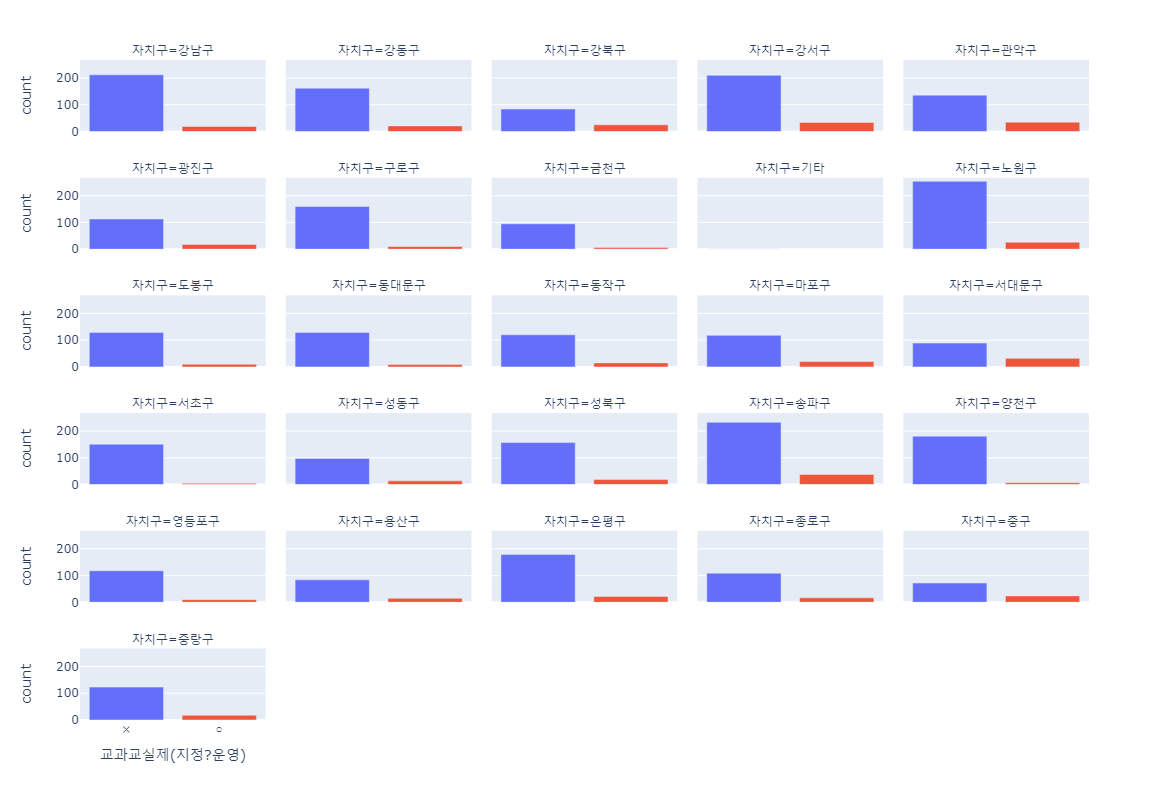

In [10]:
fig = c_table.plot(x = "교과교실제(지정?운영)", y = "count", color = "교과교실제(지정?운영)",
            backend = "plotly", facet_col = "자치구",
            kind = "bar", facet_col_wrap = 5, width = 1000, height = 800)

fig.update_layout(showlegend = False)
#fig.update_yaxes(matches=None)

`4` 자율학교제도를 운영하고 있는 학교에 개수를 구별로 파악

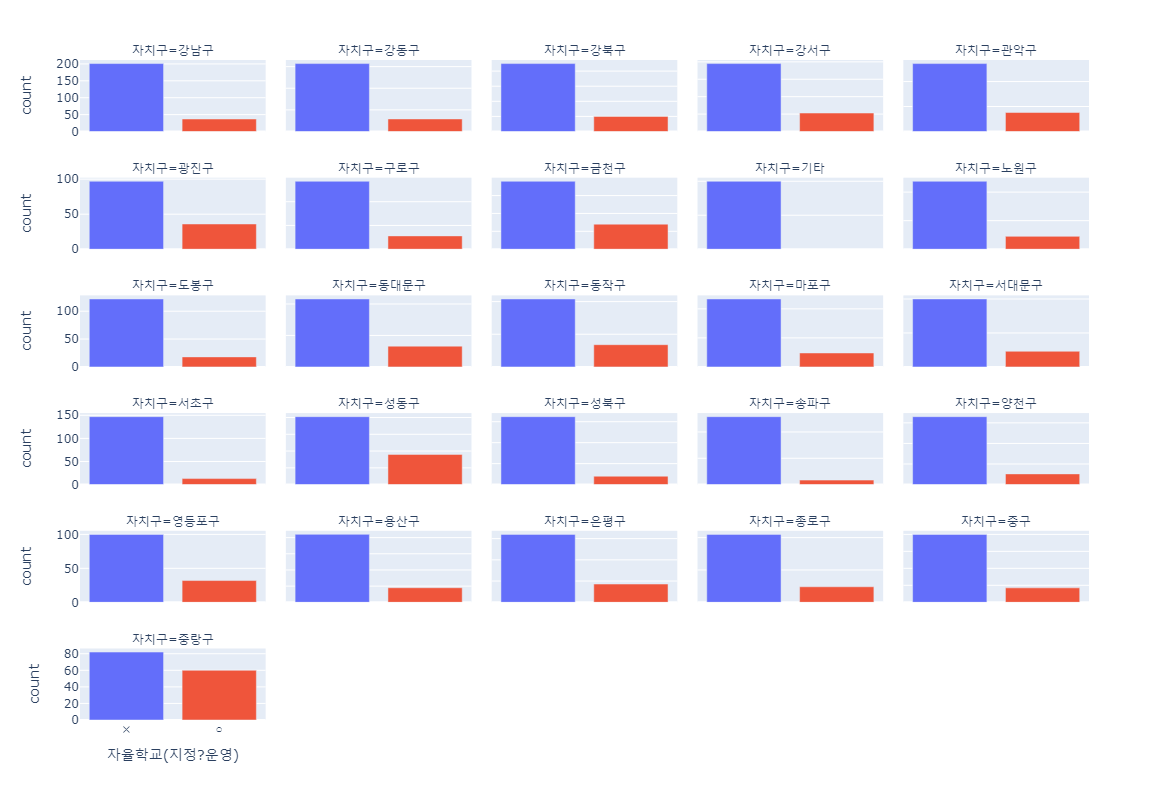

In [11]:
c_table = temp.groupby("자치구", as_index = False)[["자율학교(지정?운영)"]].value_counts()

fig = c_table.plot(x = "자율학교(지정?운영)", y = "count", color = "자율학교(지정?운영)",
            backend = "plotly", facet_col = "자치구",
            kind = "bar", facet_col_wrap = 5, width = 1000, height = 800)

fig.update_layout(showlegend = False)
fig.update_yaxes(matches=None)

`5` 수준별 수업을 운영하고 있는 학교에 개수를 구별로 파악

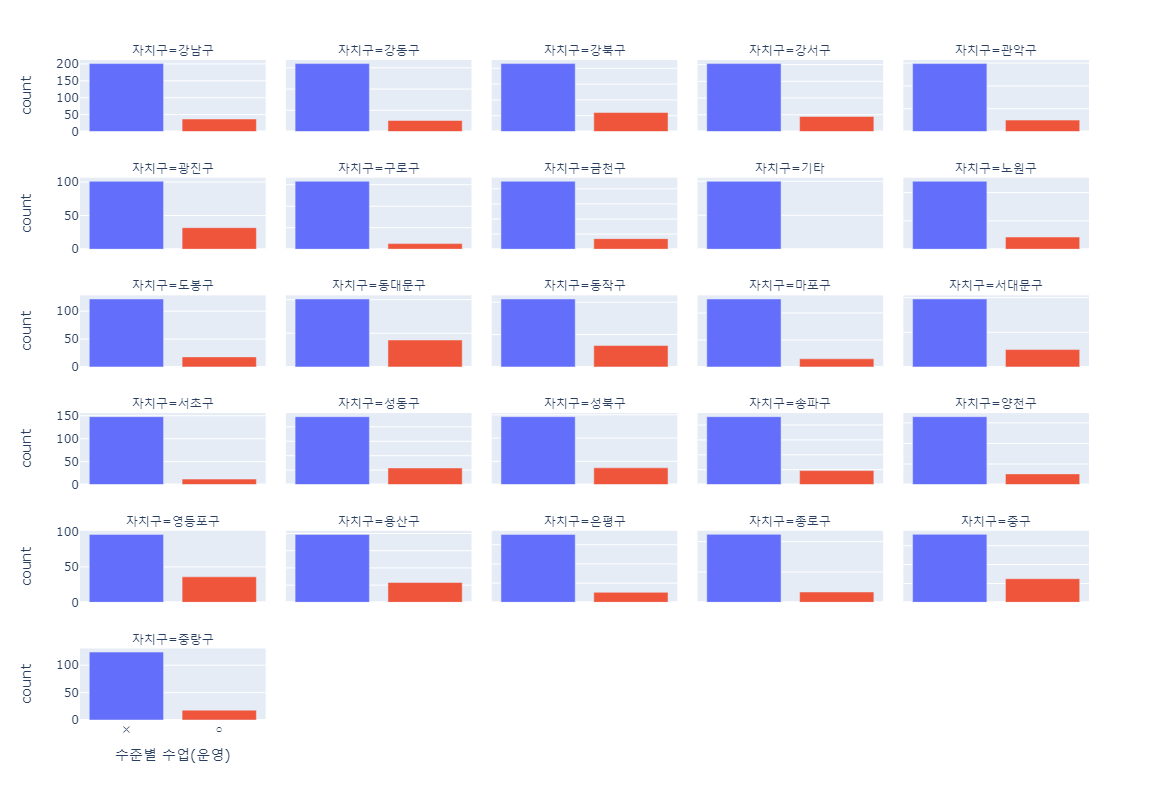

In [12]:
c_table = temp.groupby("자치구", as_index = False)[["수준별 수업(운영)"]].value_counts()

fig = c_table.plot(x = "수준별 수업(운영)", y = "count", color = "수준별 수업(운영)",
            backend = "plotly", facet_col = "자치구",
            kind = "bar", facet_col_wrap = 5, width = 1000, height = 800)

fig.update_layout(showlegend = False)
fig.update_yaxes(matches=None)

***

# 2. 서울시 학교별 보건관리 현황

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378 entries, 0 to 5377
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도교육청           5378 non-null   object 
 1   시도교육청코드         5378 non-null   object 
 2   교육지원청           5378 non-null   object 
 3   교육지원청코드         5378 non-null   object 
 4   지역              5377 non-null   object 
 5   지역코드            5377 non-null   float64
 6   소재지구분코드         5378 non-null   int64  
 7   정보공시 학교코드       5378 non-null   object 
 8   학교명             5378 non-null   object 
 9   학교급코드           5378 non-null   int64  
 10  설립구분            5378 non-null   object 
 11  제외여부            5378 non-null   object 
 12  제외사유            12 non-null     object 
 13  연간보건실 이용건수      5366 non-null   float64
 14  전체학생수           5366 non-null   float64
 15  연간1인당 보건실이용건수   5354 non-null   float64
 16  학교과정구분값(2-3-4)  2031 non-null   object 
 17  학교과정구분명(초-중-고)  2031 non-null   o

`-` 해당 데이터에서는 연간 1인당 보건실 이용건수만 보면 될 것 같다.

* 전체 학생 수 대비 보건실 이용건수를 봐야하니까...

In [17]:
df2["지역"].fillna("서울특별시 기타",inplace = True)
df2["자치구"] = [i.split()[1] for i in df2["지역"]]

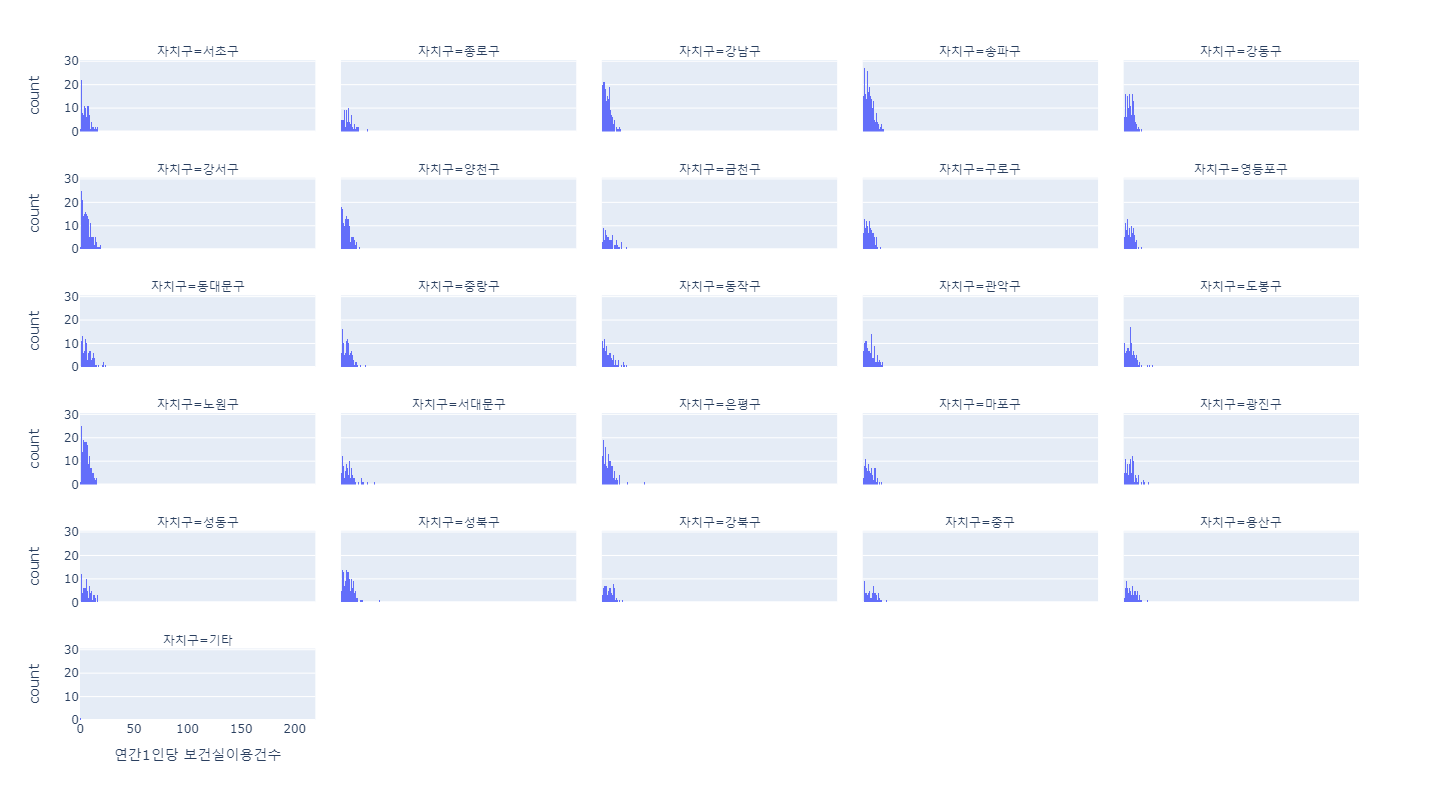

In [32]:
fig = df2.plot(x = "연간1인당 보건실이용건수", kind = "hist", backend = "plotly",
         facet_col = "자치구", facet_col_wrap = 5, width = 1000, height = 800)

fig.update_layout(showlegend = False)
#fig.update_xaxes(matches=None)

***

# 3. 서울시 학교별 직원 현황

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시도교육청            5402 non-null   object 
 1   시도교육청코드          5402 non-null   object 
 2   교육지원청            5402 non-null   object 
 3   교육지원청코드          5402 non-null   object 
 4   지역               5401 non-null   object 
 5   지역코드             5401 non-null   float64
 6   소재지구분코드          5402 non-null   int64  
 7   정보공시 학교코드        5402 non-null   object 
 8   학교명              5402 non-null   object 
 9   학교급코드            5402 non-null   int64  
 10  설립구분             5402 non-null   object 
 11  제외여부             5402 non-null   object 
 12  제외사유             6 non-null      object 
 13  일반직(남)           5396 non-null   float64
 14  일반직(여)           5396 non-null   float64
 15  일반직계             5396 non-null   float64
 16  별정직(남)(2018년이후)  5396 non-null   float64
 17  별정직(여)(2018년이후

In [36]:
df3["지역"].fillna("서울특별시 기타",inplace = True)
df3["자치구"] = [i.split()[1] for i in df3["지역"]]

In [48]:
cols = ["자치구","일반직계", "기타직계(2019년이후)"]

c_table = df3[cols]

`1` 자치구별 일반직계 합산 확인

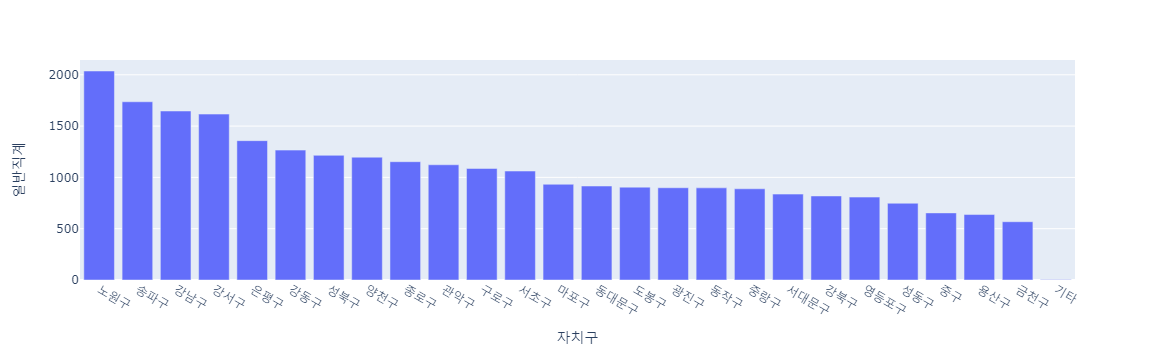

In [49]:
c_table.groupby("자치구", as_index = False)[["일반직계"]].sum().sort_values("일반직계",ascending = False).\
                    plot(x = "자치구", y = "일반직계", kind = "bar", backend = "plotly")

`2` 자치구별 기타직계 합산 확인

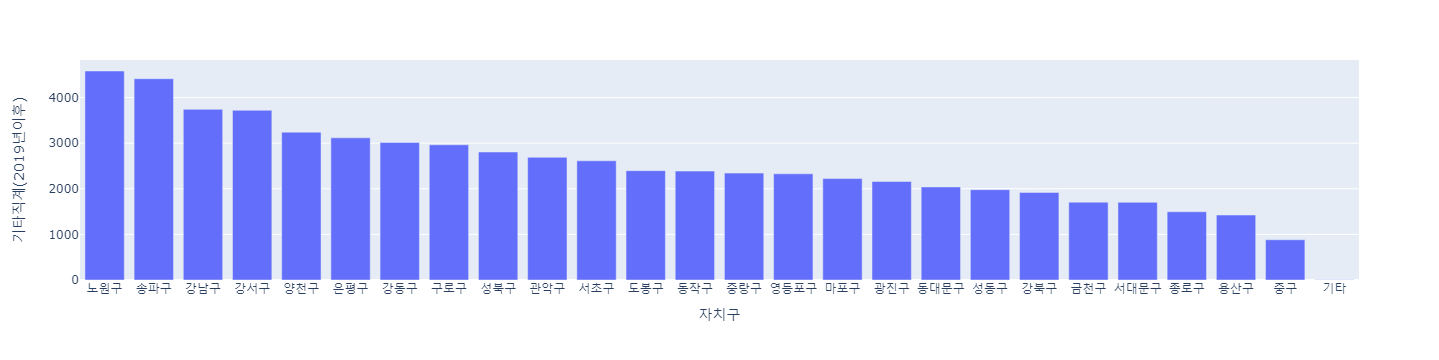

In [50]:
c_table.groupby("자치구", as_index = False)[["기타직계(2019년이후)"]].sum().sort_values("기타직계(2019년이후)",ascending = False).\
                    plot(x = "자치구", y = "기타직계(2019년이후)", kind = "bar", backend = "plotly")

***

# 4. 서울시 학교별·학급별 학생수 현황

In [55]:
df4["지역"].fillna("서울특별시 기타",inplace = True)
df4["자치구"] = [i.split()[1] for i in df4["지역"]]

In [57]:
#df4.info()

`-` 해당 데이터는 지저분한 값들이 많아서 교원당 학생 수만 보면 될 것 같다.

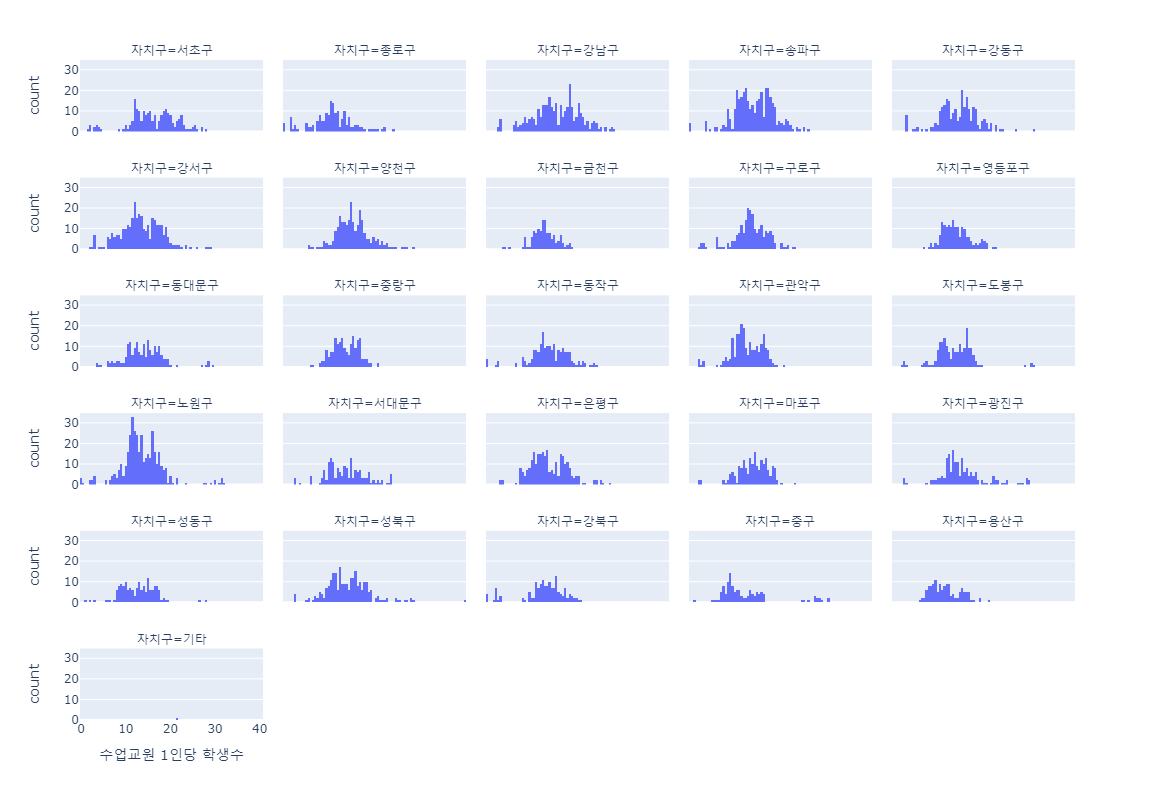

In [60]:
df4.plot(x = "수업교원 1인당 학생수", facet_col = "자치구",
         facet_col_wrap = 5, width = 1000, height = 800, kind = "hist", backend = "plotly" )

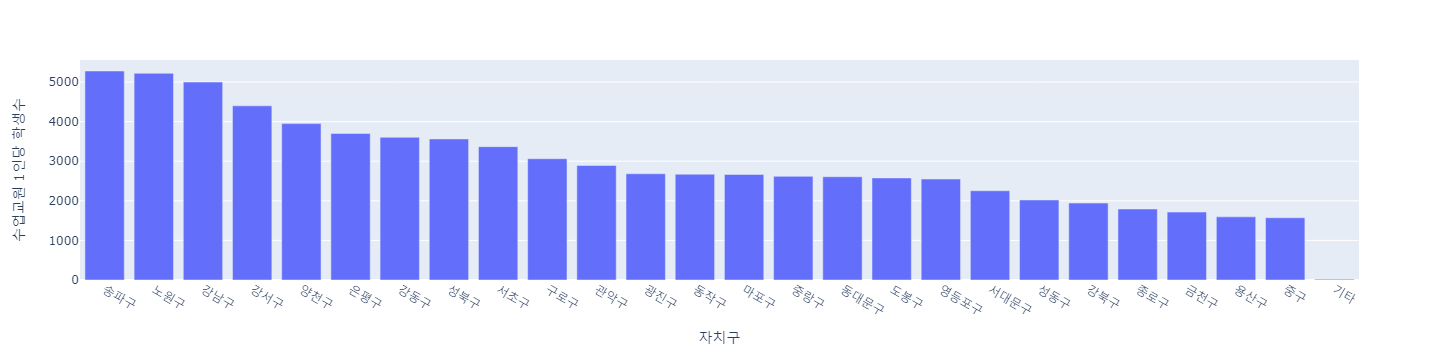

In [109]:
df4.groupby("자치구", as_index = False)["수업교원 1인당 학생수"].sum().sort_values("수업교원 1인당 학생수", ascending = False).\
            plot(x = "자치구", y = "수업교원 1인당 학생수",width = 1400, kind = "bar", backend = "plotly")

# 5. 서울시 학교별 학생의 체력 증진에 관한 사항

In [62]:
df5["지역"].fillna("서울특별시 기타",inplace = True)
df5["자치구"] = [i.split()[1] for i in df5["지역"]]

`-` 간단히 1등급 인원만 살펴보자

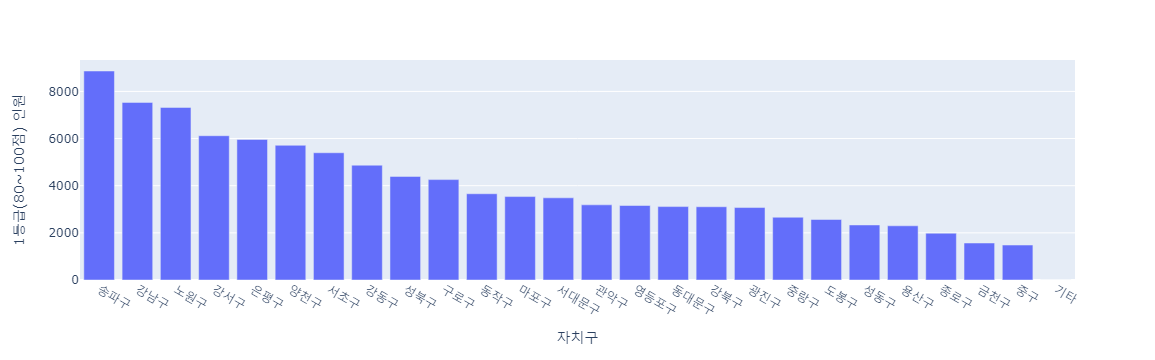

In [110]:
df5.groupby("자치구", as_index = False)["1등급(80~100점) 인원"].sum().sort_values("1등급(80~100점) 인원", ascending = False).\
            plot(x = "자치구", y = "1등급(80~100점) 인원",width = 1400, kind = "bar", backend = "plotly")

***

# 6. 서울시 학교 현황

In [74]:
df6["지역"].fillna("서울특별시 기타",inplace = True)
df6["자치구"] = [i.split()[1] for i in df6["지역"]]

`-` 해당 데이터에서는 각 자치구의 학교가 특수교육 대상자를 위한 교육을 장려하고 있는지, 학급당 학생 수는 몇명인지 파악한다.

In [82]:
cols = ["자치구", "특수학급", "순회학급", "학급당학생수"]
temp = df6[cols]

`-` 특수교육 대상자를 위한 교육이 시행되고 있는지 여부를 파악하기 위한 분석이므로 `0 또는 1`값을 가지는 데이터로 변경

* 그후 두 개의 값을 더하기

In [95]:
temp.특수학급 = [1 if i==1 else 0 for i in temp.특수학급]
temp.순회학급 = [1 if i==1 else 0 for i in temp.순회학급]

temp["특수"] = temp.특수학급 + temp.순회학급 

`-` 특수학급 및 순회학급 수 count

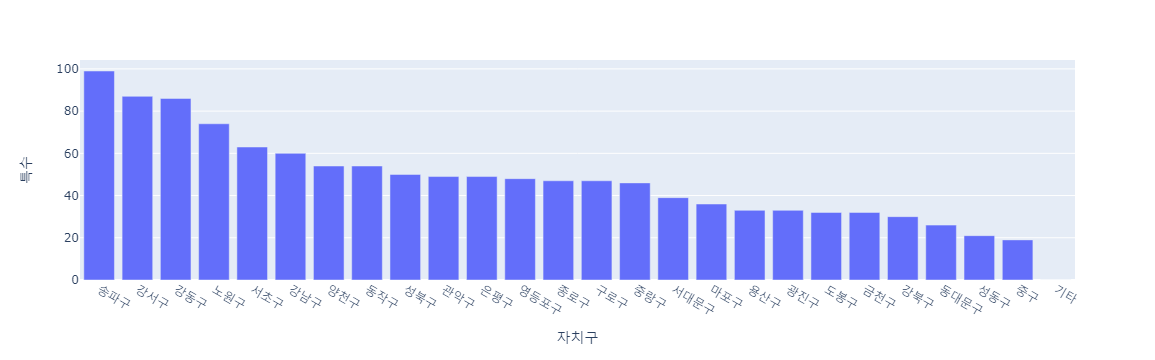

In [111]:
temp.groupby("자치구",as_index = False)[["특수"]].sum().sort_values("특수",ascending = False).\
                plot(x = "자치구", y = "특수", kind = "bar", backend = "plotly", width = 1200)

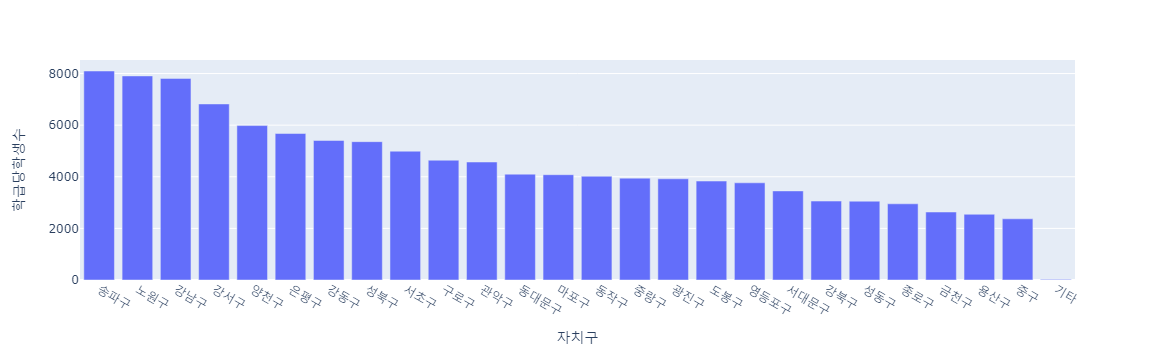

In [112]:
temp.groupby("자치구",as_index = False)[["학급당학생수"]].sum().sort_values("학급당학생수",ascending = False).\
                plot(x = "자치구", y = "학급당학생수", kind = "bar", backend = "plotly", width = 1200)

# 7. 서울시 학교별 학교시설 개방에 관한 사항

In [113]:
df7["지역"].fillna("서울특별시 기타",inplace = True)
df7["자치구"] = [i.split()[1] for i in df7["지역"]]

`-` 학교별 몇 개의 학교시설을 개방했는지 카운팅

In [131]:
cols = ["자치구","체육장 개방여부", "체육관 개방여부","강당 개방여부","일반교과교실 개방여부","특별교실 개방여부","시청각실 개방여부"]

temp = df7[cols]

In [132]:
temp = temp.melt(id_vars = "자치구")

temp["value"] = ["1" if i == "유" else "0" for i in temp.value]
temp["value"] = temp["value"].astype(int)

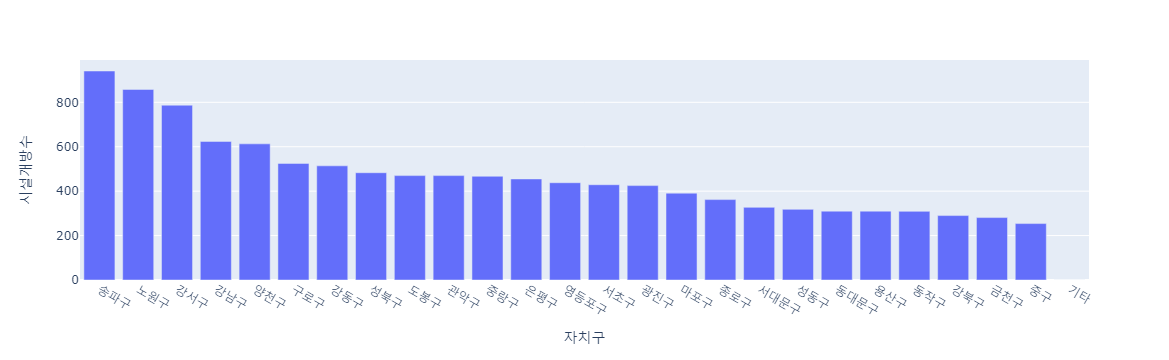

In [151]:
temp.pivot_table(values = "value",index = ["자치구"],aggfunc = "sum").reset_index().\
            rename(columns = {"value": "시설개방수"}).sort_values("시설개방수", ascending = False).\
                plot(x = "자치구", y = "시설개방수", backend ="plotly", kind = "bar")

***

# 8. 서울시 학교별 표시과목, 자격종별 교원 현황

`-` 이거는 굳이... 할 필요가 없다..

* 컬럼별 결측값도 너무 많고..그냥 나중에 학교별 과목 교원 수 살펴볼 일 있으면 사용할 듯?

***

# summary

`1` 서울시 학교별 교육운영 특색사업 계획 현황 자치구별 조사 결과

- 서울시 모든 자치구에서 교과교실제, 자율학교, 수준별 수업을 시행하고 있는 학교의 개수가 적었음

`2` 서울시 학교별 보건관리 현황 결과

* 송파구에서 극단적인 이상치 값이 관측되었음

* 확인결과 공시년도 2024년도 `덕수고등학교`에서 `연간1인당 보건실이용건수`가 `219`건으로 나왔는 데, 해당 학교에 어떤 사건, 사고가 있었던 것인지, 데이터 입력오류인지에 따라 데이터 전처리 필요성이 느껴짐

`3` 서울시 학교별 직원 현황 결과

* 의외로 노원구, 송파구가 직원 수가 가장 높게 나왔는 데, 교사인원을 합산한 것인지 아닌지 살펴볼 필요가 있다.

`4` 서울시 학교별·학급별 학생수 현황

* 수업교원 1인당 학생 수를 살펴본 결과 대부분의 정규분포를 띈다.

* 성북구 광운초등학교는 수업교원 1인당 학생 수가 `40명`을 차지한다.

* 업무의 편향이 일어나는 지 확인해볼 필요가 있음

`5` 서울시 학교별 학생의 체력 증진에 관한 사항

* 학생들의 건강상태를 1등급 학생 수로만 살펴보았을 때, `송파구`, `강남구`, `노원구` 순으로 높았다.

* 직원 수와 교원당 학생 수를 보았을 때도 세 지역의 직원 수가 가장 많았었는데, `체력`과 관련된 변수들과 상관성 분석을 해볼 필요성도 있어보인다. 

`6` 서울시 학교 현황

* 특수학생을 위한 교육여부와 학생 수도 앞선 상위 4개의 자치구가 높았음

`7` 서울시 학교별 학교시설 개방에 관한 사항

* 위와 동일

***

# do next

`1` key값 선정

`2` 전체 data set 합치기

`3` 이변량 분석

`4` 그룹 어떻게 정의할지...

- 향후 연구 서칭 필요

`5` 추가 데이터 전처리 등등